In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
data = pd.read_csv('/content/tweets (1).csv')
#test = pd.read_csv('drive/My Drive/Projects/Twitter Sentiment/test_tweets.csv')

print(data.shape)
#print(test.shape)

(7920, 3)


In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [5]:
data[data['label'] == 0].head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...
13,14,0,I just made another crazy purchase lol my theo...
15,16,0,From #DeepEllum towards #downtown #Dallas. #Bi...


In [6]:
data[data['label'] == 1].head(10)

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
10,11,1,hey #apple when you make a new ipod dont make ...
11,12,1,Ha! Not heavy machinery but it does what I nee...
12,13,1,Contemplating giving in to the iPhone bandwago...
14,15,1,@shaqlockholmes @sam_louise1991 the battery is...
18,19,1,The reason I don't have one. #iphone #suck #ap...
19,20,1,How is the apple store gunna be out of 5C scre...
22,23,1,I've had this new ipod for four days? And this...
23,24,1,when your iPhone screen goes completely black ...


<Axes: >

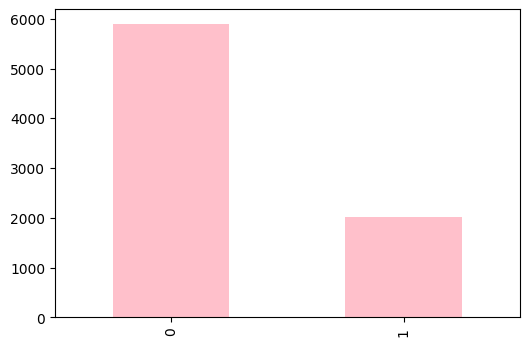

In [7]:
data['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

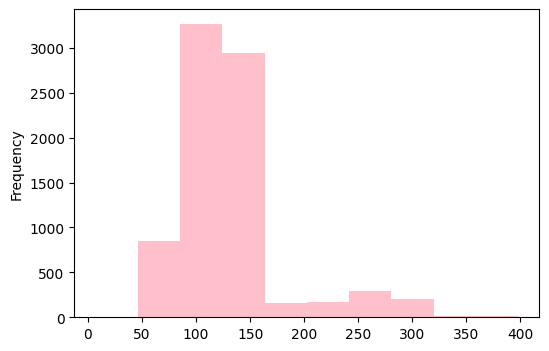

In [9]:
length_data = data['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
#length_data = data['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [10]:

data['len'] = data['tweet'].str.len()
#test['len'] = test['tweet'].str.len()

data.head(10)

,id,label,tweet,len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,2,0,Finally a transparant silicon case ^^ Thanks t...,131
2,3,0,We love this! Would you go? #talk #makememorie...,123
3,4,0,I'm wired I know I'm George I was made that wa...,112
4,5,1,What amazing service! Apple won't even talk to...,124
5,6,1,iPhone software update fucked up my phone big ...,65
6,7,0,Happy for us .. #instapic #instadaily #us #son...,100
7,8,0,New Type C charger cable #UK http://www.ebay.c...,259
8,9,0,Bout to go shopping again listening to music #...,130
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,128


In [11]:
data.groupby('label').describe()

id                                                           \
        count         mean          std  min      25%     50%      75%   
label                                                                    
0      5894.0  3954.497285  2290.734085  1.0  1971.25  3958.5  5927.50   
1      2026.0  3977.962981  2274.419827  5.0  2019.50  3968.5  5966.75   

                  len                                                           
          max   count        mean        std   min    25%    50%    75%    max  
label                                                                           
0      7920.0  5894.0  137.201391  51.153725   7.0  114.0  126.0  133.0  398.0  
1      7914.0  2026.0  104.830701  29.888029  43.0   84.0  106.0  124.0  330.0

<ipython-input-12-09cfbc23db04>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)


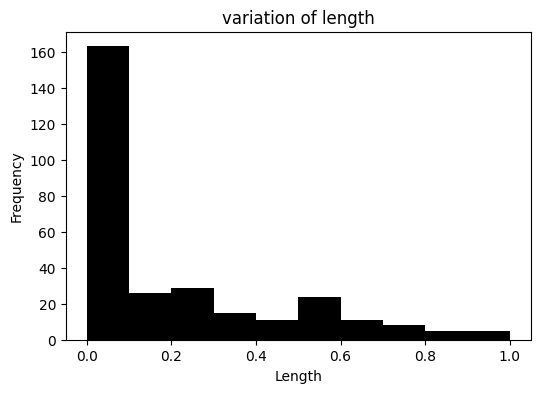

In [12]:

data.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

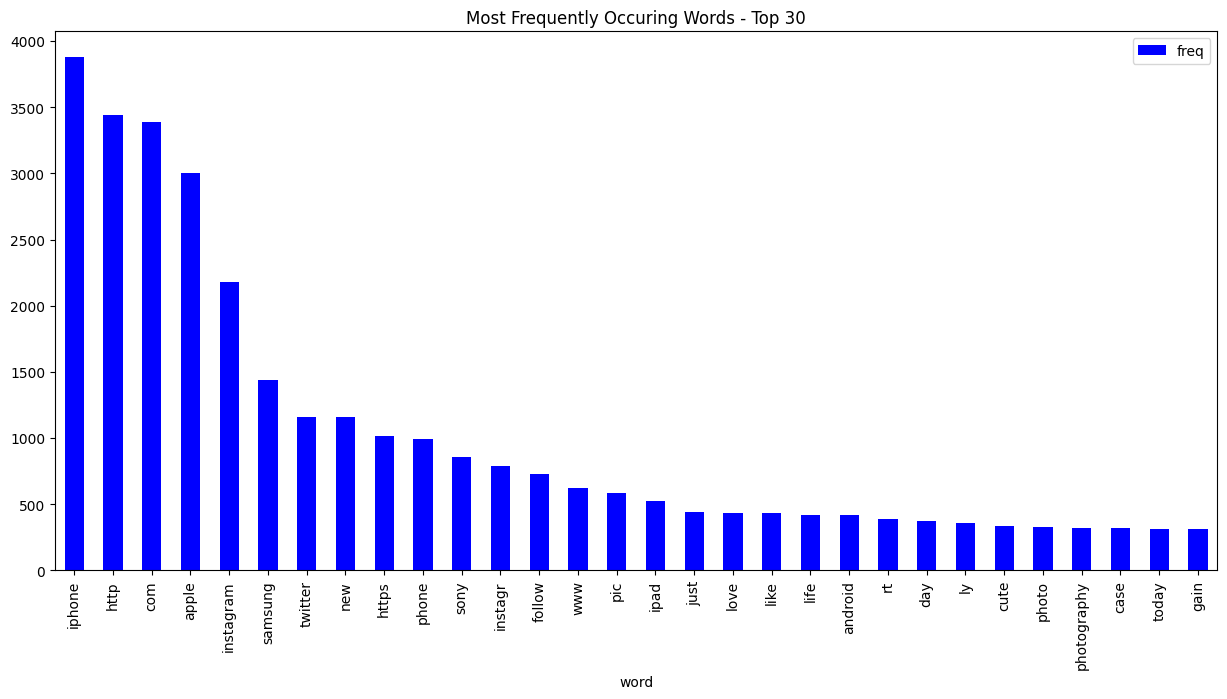

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

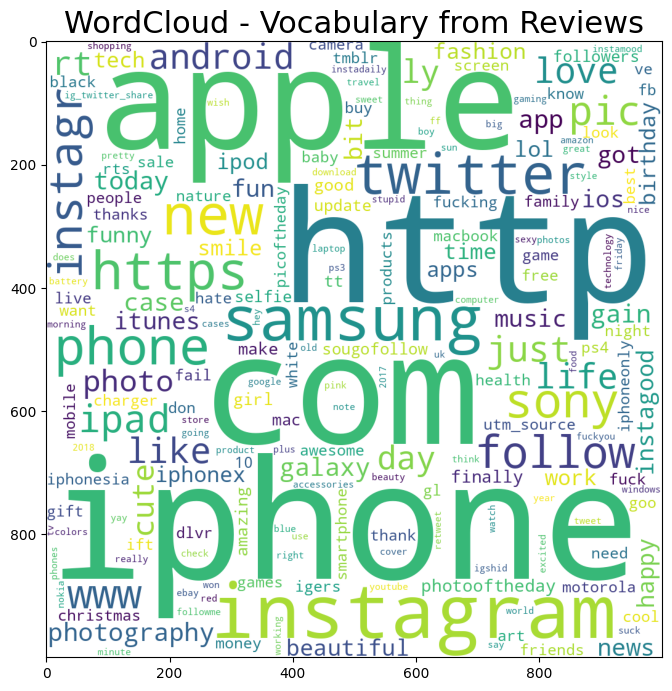

In [14]:

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

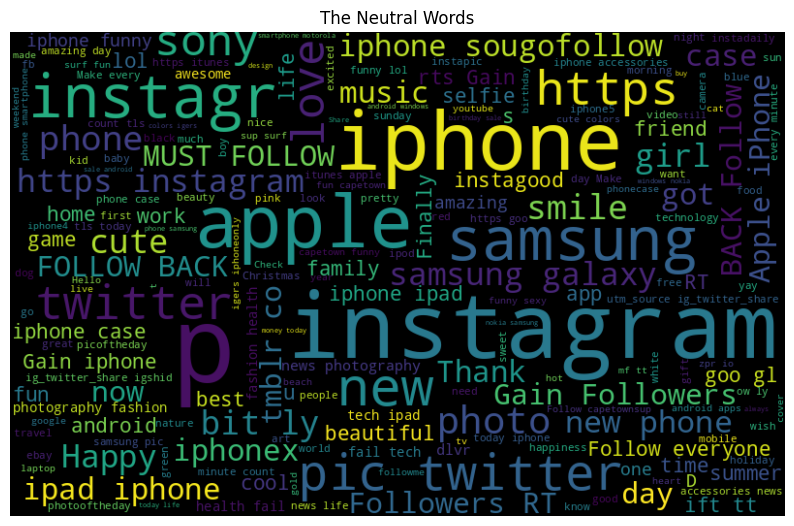

In [15]:
normal_words =' '.join([text for text in data['tweet'][data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


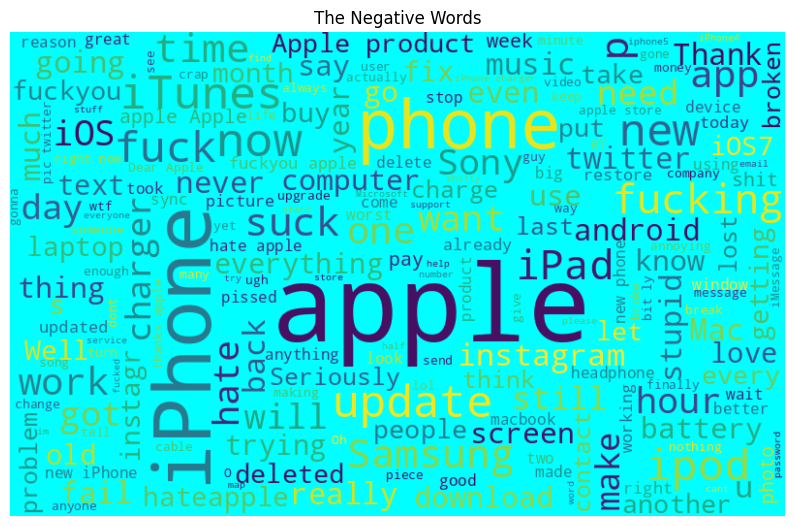

In [16]:
negative_words =' '.join([text for text in data['tweet'][data['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [19]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [22]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(data['tweet'][data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['tweet'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

NameError: ignored

In [ ]:

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:

a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = data['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.data(tokenized_tweet, total_examples= len(data['tweet']), epochs=20)

In [ ]:
model_w2v.wv.most_similar(positive = "dinner")

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")

In [ ]:

model_w2v.wv.most_similar(positive = "apple")

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:

data_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', data['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  data_corpus.append(review)

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(data_corpus).toarray()
y = data.iloc[:, 1]

print(x.shape)
print(y.shape)